# Материалы 

- Презентация https://disk.yandex.ru/i/nvV4sztw8esdww
- Дешборд https://public.tableau.com/views/game_16695438887000/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Содержание 
- 1)  Загрузим данные
- 2)  Исследовательский анализ данных
- 3)  Сформируем модель монетизации
- 4)  Проанализируем влияние событий на совершение целевого события
- 5)  Проверим статистические гипотезы
- 5.1)  Подготовим данные
- 5.2)  Проверим гипотезу: 'Среднее время прохождения уровня между PVE и PVP пользователями не различается"
- 5.3)  Проверим гипотезу: 'Среднее количество построенных зданий пользователями, привлеченных из каналов yandex_direct и youtube_channel_reklama, не различается"
- 6)  Вывод

# Проект Формирование модели монетизации

Задача: Сформировать модель монетизации игрового приложения.

- Провести исследовательский анализ данных

- Проанализивать влияние событий на совершение целевого события

- Проверить статистические гипотезы

Проверьте гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

Сформулируйте и проверьте статистическую гипотезу относительно представленных данных

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки. В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

Победа над первым врагом
Реализация проекта - разработка орбитальной сборки спутников
В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно

## Загрузим данные

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
game_actions = pd.read_csv('/datasets/game_actions.csv')
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
user_source = pd.read_csv('/datasets/user_source.csv')

In [3]:
df_list = game_actions, ad_costs, user_source
for df in df_list:
    df.duplicated().sum()
    display(df.head())
    df.info()
    display(df.isna().sum())
    print(50* '*')#Посмотрим на данные

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

**************************************************


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


source    0
day       0
cost      0
dtype: int64

**************************************************


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


user_id    0
source     0
dtype: int64

**************************************************


In [4]:
game_actions.describe()

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-08 21:56:19,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly
freq,4,127957,59325,22,1866


In [5]:
game_actions.duplicated().sum(), ad_costs.duplicated().sum(), user_source.duplicated().sum()

(1, 0, 0)

In [6]:
game_actions = game_actions.drop_duplicates()

In [7]:
game_actions['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

In [8]:
game_actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [9]:
(len(game_actions.loc[:, ['building_type', 'event']].query('event == "finished_stage_1"')) 
+ len(game_actions.loc[:, ['building_type', 'event']].query('event == "project"')))

7683

События finished_stage_1 и project не являются зданиями, т.е. не отображаются в building_type, количество пропусков в building_type соответвует сумме событий finished_stage_1 и project. Пропуски не требуют заполнения.

In [10]:
game_actions['date'] = pd.to_datetime(game_actions['event_datetime']).dt.date
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

# Вывод 
В основном датасете game_actions 5 колонок, 133774 строк. Обнаружен и удален один дубликат. Пропуски в датасете объясняются разным типом событий в колонках и не требуют заполнения. В датасетах ad_costs и user_source пропуски и дубликаты отсутствуют. В user_id количество уникальных пользователей соответствует количеству уникальных пользователей в game_actions.

## Исследовательский анализ данных

In [11]:
game_actions['event_datetime'].min()#первое событие

'2020-05-04 00:00:01'

In [12]:
game_actions['event_datetime'].max()#последнее событие

'2020-06-05 12:32:49'

In [13]:
df['user_id'].nunique()#количесвто уникальных юзеров

13576

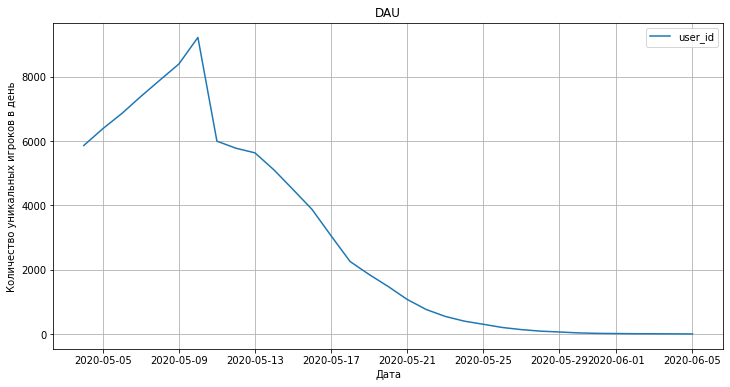

In [14]:
game_actions.groupby('date').agg({'user_id': 'nunique'}).plot(figsize = (12, 6))
plt.ylabel('Количество уникальных игроков в день')
plt.xlabel('Дата')
plt.title('DAU')
plt.grid()
plt.show();

За неделю рекламной кампании привлечено 13576 игроков, после окончания рекламной кампании уникальных игроков падает, до конца месяца юзеры либо уходят в отток, либо переходят на следующий уровень.

In [15]:
game_actions.groupby('user_id').agg({'event_datetime': 'count'}).describe()

,event_datetime
count,13576.000000
mean,9.991087
std,4.146133
min,1.000000
25%,6.000000
50%,10.000000
75%,13.000000
max,22.000000


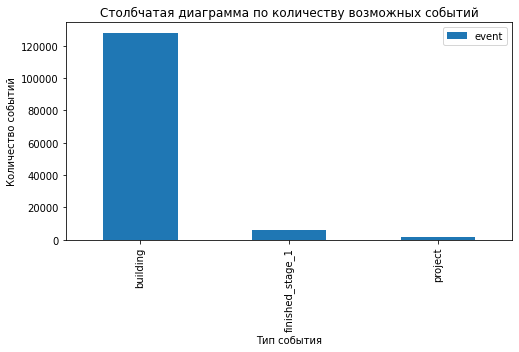

In [16]:
game_actions.groupby('event').agg({'event' : 'count'}).plot(kind= 'bar', figsize = (8, 4))
plt.xlabel("Тип события")
plt.ylabel("Количество событий")
plt.title('Столбчатая диаграмма по количеству возможных событий')
plt.show();

In [51]:
game_actions.groupby('event').agg({'event' : 'count'})

,event
event,
building,127956
finished_stage_1,5817
project,1866


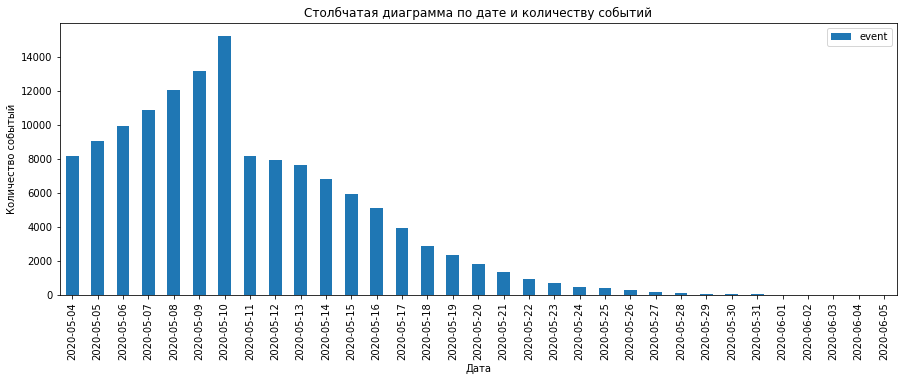

In [18]:
game_actions.groupby('date').agg({'event' : 'count'}).plot(kind= 'bar', figsize = (15, 5))
plt.xlabel("Дата")
plt.ylabel("Количество событый")
plt.title('Столбчатая диаграмма по дате и количеству событий')
plt.show();

За месяц построенно 127956 зданий, в среднем каждый игрок строит 10 зданий. Всего перешли на следующий уровень 5817 игроков из них 1866 выполнением проекта satellite_orbital_assembly. Также можно наблюдать падение активности юзеров после 10 мая.

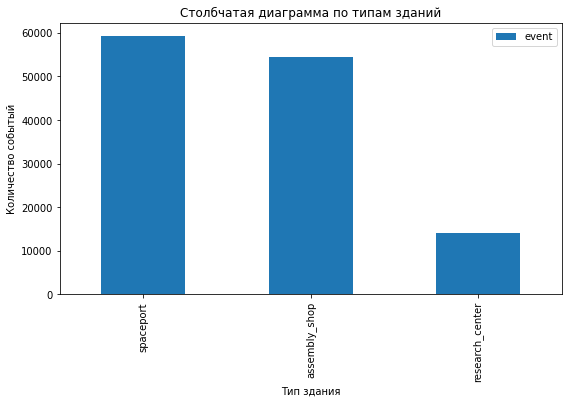

In [19]:
game_actions.groupby('building_type').agg({'event' : 'count'}).reset_index().sort_values(by='event', ascending=False).plot(x='building_type', y='event',kind= 'bar', figsize = (9, 5))
plt.xlabel("Тип здания")
plt.ylabel("Количество событый")
plt.title('Столбчатая диаграмма по типам зданий')
plt.show();

In [20]:
game_actions.groupby('building_type').agg({'event' : 'count'}).reset_index()

,building_type,event
0,assembly_shop,54494
1,research_center,14137
2,spaceport,59325


# Вывод 
Меньше всего строят здание research_center. Assembly_shop и spaceport строят примерно одинакого

42,84% пользователей завершили первый уровень. За месяц построено 127956 зданий, в среднем каждый игрок строит 10 зданий

## Сформируем модель монетизации

In [21]:
ad_costs['day'] = ad_costs['day'].astype('datetime64')
game_actions['event_datetime'] = game_actions['event_datetime'].astype('datetime64')

In [22]:
ad_costs['day'] = ad_costs['day'] + timedelta(days=1)

In [23]:
channels = game_actions.merge(user_source, on='user_id', how='left')

Посчитаем количество привлеченных пользователей, игроков завершивших уровень один и САС, с разбивкой по рекламным каналам:

In [24]:
source = (ad_costs.groupby(['source'])
          .agg({'cost' : 'sum'})
          .reset_index().merge(channels.groupby('source').agg({'user_id' : 'nunique'}).reset_index(),on='source')
          .rename(columns={'user_id': 'players'}))
source = (source
          .merge(channels.query('event == "finished_stage_1"')
          .groupby('source').agg({'user_id' : 'nunique'}).reset_index())
          .rename(columns={'user_id': 'finsished_lev1'}))
source['CAC'] = source['cost'] / source['players']


In [25]:
ad_costs.groupby(['day']).agg({'cost' : 'sum'}).reset_index()# Расходы на рекламу с разбивкой по дням

,day,cost
0,2020-05-04,3302.451840
1,2020-05-05,1865.004649
2,2020-05-06,1029.431469
3,2020-05-07,620.476519
4,2020-05-08,391.852033
5,2020-05-09,242.767553
6,2020-05-10,151.592924


In [26]:
channels['revenue'] = np.where(channels['event'] == 'building', 0.07, 0)

In [27]:
source = source.merge(channels.groupby('source').agg({'revenue' : 'sum', }).reset_index())
source['ROMI (%)'] = (source['revenue'] / source['cost']) *100 #посчитаем ROMI

In [28]:
source.loc[len(source.index)] = ['Общая сумма значений, средние значения САС и ROMI', source['cost'].sum(), source['players'].sum(), source['finsished_lev1'].sum(), source['CAC'].mean(), source['revenue'].sum(), source['ROMI (%)'].mean()]

In [29]:
source['profit'] = source['revenue'] - source['cost']#вычислим теоретическую прибыль

In [30]:
source

,source,cost,players,finsished_lev1,CAC,revenue,ROMI (%),profit
0,facebook_ads,2140.904643,2726,1150,0.785365,1829.17,85.439116,-311.734643
1,instagram_new_adverts,2161.441691,3347,1466,0.645785,2227.05,103.035396,65.608309
2,yandex_direct,2233.111449,4817,2042,0.463590,3152.24,141.159099,919.128551
3,youtube_channel_reklama,1068.119204,2686,1159,0.397662,1748.46,163.695212,680.340796
4,"Общая сумма значений, средние значения САС и ROMI",7603.576987,13576,5817,0.573100,8956.92,123.332206,1353.343013


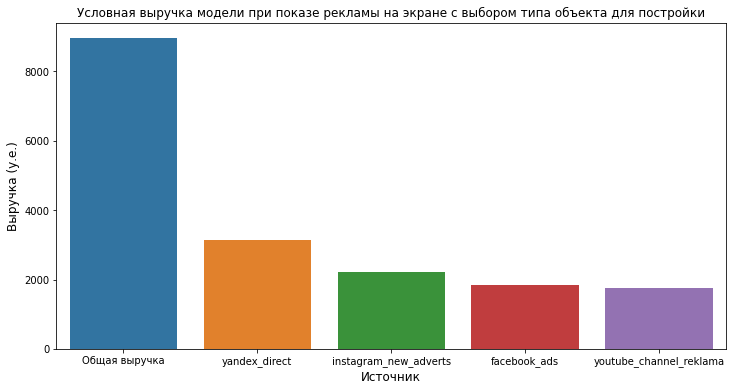

In [31]:
source.loc[4, 'source'] = 'Общая выручка'
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='source', y='revenue', data=source.sort_values(by='revenue', ascending=False))
plt.xlabel('Источник',fontsize=12)
plt.ylabel('Выручка (у.е.)',fontsize=12)
plt.title('Условная выручка модели при показе рекламы на экране с выбором типа объекта для постройки');

Общие расходы на рекламную кампанию состоваляют 7,603.58 у.е. При модели предложенной заказчиком и CPM 70, прибыль составит 1,353.34 у.е. При этом, платформа facebook_ads показывает ROMI ниже 100% и потери в сумее 311.73 у.е, что требует корректировки стратегии продвижения для данной платформы. К сожалению при столь агрессивном подходе к показе рекламы неизбежно увеличение оттока пользователей, поэтому мы предлагаем ненамного уменьшить количество показов, демонстрируя рекламу только при строительстве "assembly_shop" и "spaceport":

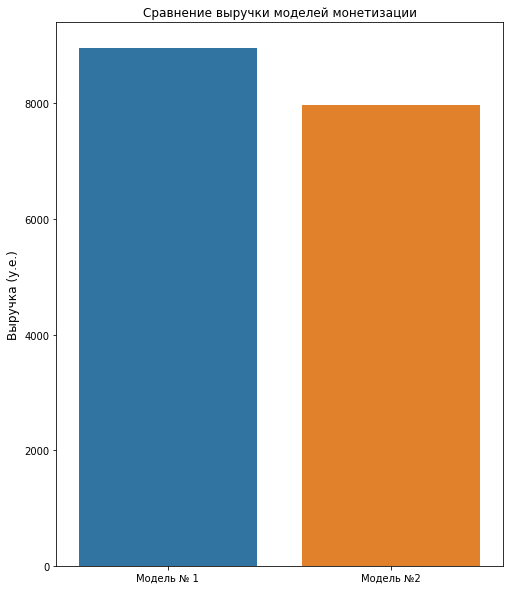

In [32]:
x = ['Модель № 1', 'Модель №2']
y = [8956.92, 7967.33]
plt.subplots(figsize=[8,10])
plt.title('Сравнение выручки моделей монетизации')
plt.ylabel('Выручка (у.е.)',fontsize=12)
sns.barplot(x, y);

In [33]:
game_actions.query("building_type == 'assembly_shop' or building_type == 'spaceport'")['building_type'].count() * 0.07
#Выручка при показе рекламы при стрительстве "assembly_shop" и "spaceport":

7967.330000000001

In [34]:
game_actions.query("building_type == 'assembly_shop' or building_type == 'spaceport'")['building_type'].count() * 0.07 - source.loc[4,'cost']
#Прибыль при показе рекламы при строительстве "assembly_shop" и "spaceport", без учета оттока игроков из-за показов рекламы

363.7530132119782

Данная модель показывет условную прибыль уже на этапе первого уровня игры и позволяет минимизировать отток игроков из-за показов рекламы

## Проанализируем влияние событий на совершение целевого события

In [35]:
mtrx = game_actions[['user_id','event','building_type','project_type', 'date']]

In [36]:
finished_users = game_actions.query('event == "finished_stage_1"')['user_id'].unique()
project_users = game_actions.query('project_type == "satellite_orbital_assembly"')['user_id'].unique()

In [37]:
level_complete=[]
for i in mtrx['user_id']:
    if i in finished_users:
        level_complete.append(1)
    else:
        level_complete.append(0)

In [38]:
project_complete=[]
for i in mtrx['user_id']:
    if i in project_users:
        project_complete.append(1)
    else:
        project_complete.append(0)

In [39]:
mtrx['level_complete'] = level_complete
mtrx['project_complete'] = project_complete

In [40]:
mtrx['research_center'] = np.where(mtrx['building_type'] == 'research_center', 1, 0)
mtrx['assembly_shop'] = np.where(mtrx['building_type'] == 'assembly_shop', 1, 0)
mtrx['spaceport'] = np.where(mtrx['building_type'] == 'spaceport', 1, 0)

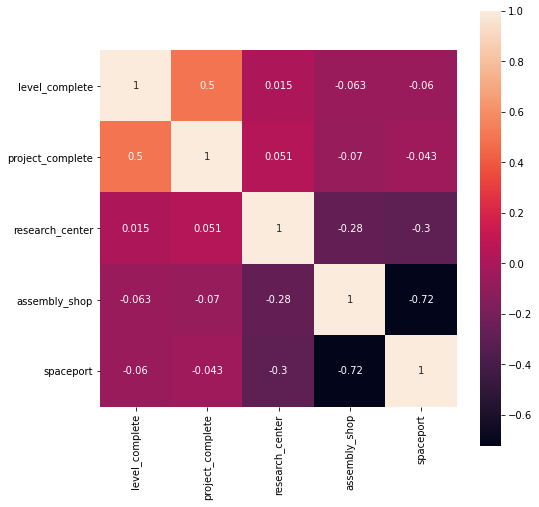

,level_complete,project_complete,research_center,assembly_shop,spaceport
level_complete,1.000000,0.497574,0.015241,-0.062981,-0.060241
project_complete,0.497574,1.000000,0.051021,-0.069927,-0.043229
research_center,0.015241,0.051021,1.000000,-0.279531,-0.300749
assembly_shop,-0.062981,-0.069927,-0.279531,1.000000,-0.722537
spaceport,-0.060241,-0.043229,-0.300749,-0.722537,1.000000


In [41]:
plt.subplots(figsize=[8,8])
sns.heatmap(mtrx.corr(), annot=True, square=True)
plt.show()
mtrx.corr()

# Вывод 
Какие либо события практически не влияют на совершения целевого события. Есть сильная обратная взаимосвязь между событиями строительство "assembly_shop" и строительство "spaceport", что говорит в пользу версии модели с показами рекламы только на двух этих событиях.

## Проверим статистические гипотезы

### Подготовим данные

In [42]:
time_f = (game_actions.groupby('user_id')
        .agg({'event_datetime': 'first',})
        .rename(columns={'event_datetime': 'first_ts'})
        .reset_index())
time_l = (game_actions.groupby('user_id')
        .agg({'event_datetime': 'last',})
        .rename(columns={'event_datetime': 'last_ts'})
        .reset_index())
time = time_f.merge(time_l)

In [43]:
fs = (game_actions.query('event == "finished_stage_1"')
    .merge(game_actions.query('project_type == "satellite_orbital_assembly"'), on = 'user_id', how = 'left'))

In [44]:
fs = fs.merge(time, on = 'user_id', how = 'left')

In [45]:
fs = fs[['user_id','event_x','project_type_y', 'first_ts', 'last_ts']]
fs.rename(columns = {'event_x' : 'event', 'project_type_y' : 'pve'}, inplace = True)

In [46]:
fs['spent_time'] = fs['last_ts'] - fs['first_ts']# время затраченное на прохождение первого уровня
fs['spent_time'] = fs['spent_time'].dt.total_seconds()# переведем в секунды

In [47]:
fs.tail()

,user_id,event,pve,first_ts,last_ts,spent_time
5812,22cce310-fe10-41a2-941b-9c3d63327fea,finished_stage_1,NaN,2020-05-04 18:38:25,2020-06-04 15:50:38,2668333.0
5813,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,finished_stage_1,satellite_orbital_assembly,2020-05-07 02:18:19,2020-06-04 17:56:14,2475475.0
5814,515c1952-99aa-4bca-a7ea-d0449eb5385a,finished_stage_1,NaN,2020-05-07 07:28:50,2020-06-05 02:25:12,2487382.0
5815,32572adb-900f-4b5d-a453-1eb1e6d88d8b,finished_stage_1,NaN,2020-05-07 05:43:45,2020-06-05 12:12:27,2528922.0
5816,f21d179f-1c4b-437e-b9c6-ab1976907195,finished_stage_1,NaN,2020-05-06 02:56:25,2020-06-05 12:32:49,2626584.0


### Проверим гипотезу: 'Среднее время прохождения уровня между PVE и PVP пользователями не различается"

- H0: Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком не различается
- H1: Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком различается

In [48]:
alpha = 0.05
results = st.ttest_ind(fs.query("pve != 'satellite_orbital_assembly'")['spent_time'], fs.query("pve == 'satellite_orbital_assembly'")['spent_time'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    

p-значение: 7.256845329495443e-98
Отвергаем нулевую гипотезу



Время прохождения уровня между PVE и PVP пользователями различается. В среднем PVE игроки завершают уровень дольше чем PVP игроки.

### Проверим гипотезу: 'Среднее количество построенных зданий пользователями, привлеченных из каналов yandex_direct и youtube_channel_reklama, не различается"

- H0: Среднее количество построенных зданий пользователями, привлеченных из каналов yandex_direct и youtube_channel_reklama не различается
- H1: Среднее количество построенных зданий пользователями, привлеченных из каналов yandex_direct и youtube_channel_reklama различается

In [49]:
yt=channels.query('source == "youtube_channel_reklama"').groupby('user_id').agg({'building_type': 'count'}).reset_index()['building_type']
yd=channels.query('source == "yandex_direct"').groupby('user_id').agg({'building_type': 'count'}).reset_index()['building_type']

In [50]:
alpha = 0.05
results = st.ttest_ind(yt, yd)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    

p-значение: 0.5972890424874877
Не получилось отвергнуть нулевую гипотезу



Среднее количество построенных зданий пользователями, привлеченных из каналов yandex_direct и youtube_channel_reklama не различается. Пользователи привлеченные из этих каналов ведут себя одинакого.

# Общий вывод 
Модель предложенная заказчиком, имеет теоритическую прибыль прибыль в 1,353.34 у.е. и общую окупаемость рекламной кампании, при условии отсутствия оттока пользователей из-за показов рекламы. При этом был обнаружен убыток в размере 311.73 у.е. от источника facebook_ads.

Для минимизации оттока юзеров рекомендуем использовать модель монетизации с показом рекламы только на событиях: "постройка assembly_shop" и "постройка spaceport". Отрицательная взаимосвязь между этими событиями(чем больше строят одно тем меньше другое) снизит частоту показа рекламы игрокам и позволит снизить отток юзеров, при этом данная модель остается прибыльной и позволит в какой-то мере снизить раздражение игроков по поводу слишком частого показа рекламы.

Независимо от выбора модели монетизации рекомендуется скорректирововть стратегию продвижения продукта для платформы facebook_ads.